# Why We should avoid Non Zero Constant Weight Initialization:
- due to vanishing gradient problel, Exploding gradient problem and convergence slow.
## let's understand:
- suppose activation function Relu, and initial weight = 0.5, bias = 0.5
-  for any neuron in first layer output is written as,

z11 = w11 * x1 + w12 *x2 + b11
- z is non 0 when w11 = w12 = 0.5 and b11 = 0.5 , but it will constant
- a11 = max(0,z11) will non - zero
- again same z12 = w21 * x1 + w22 * x2 + b12
- z12 will non zero but constant at w21 = w22 = 0.5 and b12 = 0.5
- and activation value for node 2 , like a12 =max(0,z12) ---> non-zero
## final conclusion z11 = z12, a11 = a12
1. so, derivation of loss funtion wrt weight will same for one input node and same for other input node,

   $L/$w11 = $L/$w12 and $L/$w21 = $L/$w22
   
2. then our model will behave like linear model and not able to find pattern in non linear data.


In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ushape/ushape.csv


In [2]:
df = pd.read_csv("/kaggle/input/ushape/ushape.csv")

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df.rename(columns = {'3.159499363321345566e-02':'X','9.869877579082642072e-01':'Y','0.000000000000000000e+00':'class'},inplace=  True)

In [6]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [7]:
df.shape

(99, 3)

In [8]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

X        0
Y        0
class    0
dtype: int64

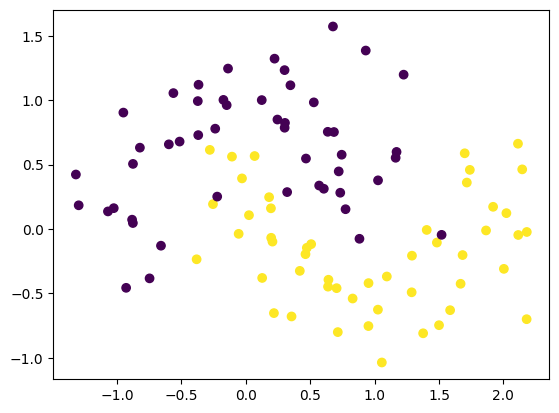

In [11]:
plt.scatter(df['X'],df['Y'],c = df['class'])

In [12]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# set parameters to 0
model.get_weights()

[array([[ 0.8181275 , -0.64622074],
        [ 0.8768517 , -0.06772518]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.2772301 ],
        [0.52632105]], dtype=float32),
 array([0.], dtype=float32)]

In [17]:
initial_weights = model.get_weights()

In [18]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [19]:
model.set_weights(initial_weights)

In [20]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [21]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [22]:
history = model.fit(X,y,epochs=100,validation_split = 0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5110 - loss: 0.8499 - val_accuracy: 0.5000 - val_loss: 0.8362
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5344 - loss: 0.8199 - val_accuracy: 0.5000 - val_loss: 0.8340
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4875 - loss: 0.8740 - val_accuracy: 0.5000 - val_loss: 0.8319
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5149 - loss: 0.8364 - val_accuracy: 0.5000 - val_loss: 0.8299
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4914 - loss: 0.8642 - val_accuracy: 0.5000 - val_loss: 0.8278
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5110 - loss: 0.8391 - val_accuracy: 0.5000 - val_loss: 0.8258
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4914 - loss: 0.8626 - val_accuracy: 0.5000 - val_loss: 0.8238
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5266 - loss: 0.8145 - val_accuracy: 0.5000 - val_loss:

In [23]:
model.get_weights()

[array([[0.71531814, 0.71531814],
        [0.24563727, 0.24563727]], dtype=float32),
 array([0.27445462, 0.27445462], dtype=float32),
 array([[0.26787344],
        [0.26787344]], dtype=float32),
 array([0.25318262], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 971us/step


<Axes: >

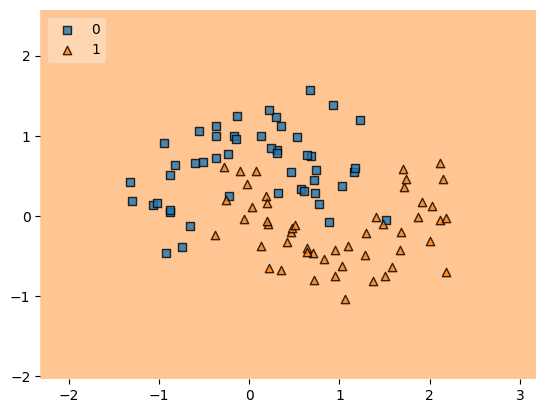

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)

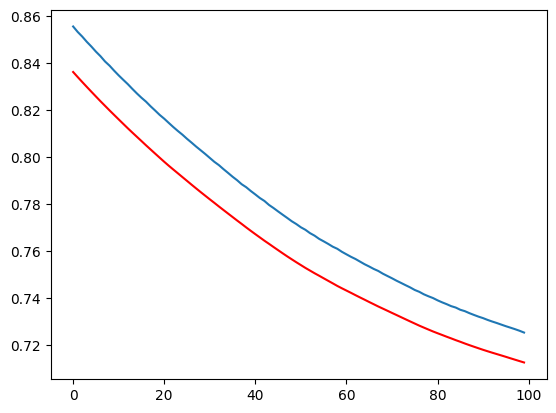

In [28]:
plt.plot(history.history['loss'],)
plt.plot(history.history['val_loss'],color = 'red')

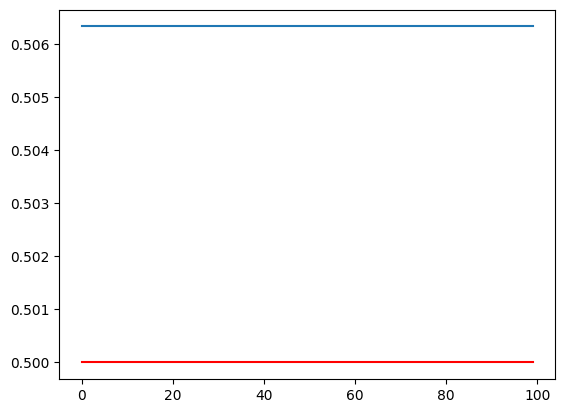

In [29]:
plt.plot(history.history['accuracy'],)
plt.plot(history.history['val_accuracy'],color = 'red')